# TASK 1.1: Visualizing the Data

In this notebook, we have stored all the visualizations of the training and location datasets. We only plotted the attributes which made sense to visualize. 

***Note: We have removed the images from the plots folder because of file size limitation, running this entire notebook will produce and output the images to the plots folder as well***


#### First we import the data files and python libraries

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import statistics
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

train = pd.read_csv('../data/cases_train.csv')
test = pd.read_csv('../data/cases_test.csv')
#location = pd.read_csv('../data/location.csv')
location = pd.read_csv('../results/location_transformed.csv')

## The missing values in the 3 datasets

In [ ]:
# the missing values for each attribute in the training dataset
train.isnull().sum()

In [ ]:
# the missing values for each attribute in the testing dataset
test.isnull().sum()

In [ ]:
# the missing values in the locations dataset
location.isnull().sum()

## The Visualizations of the attributes in the "Training" Dataset:

***The distribution of gender in the data***

In [ ]:
train['sex'] = train['sex'].replace(np.nan, 'unidentified') # label the NaN values
gender = train['sex'].value_counts() # Count of all unique values 
colour = ['#b9edd3','#76b6e3', '#dac5ed']
figure = gender.plot(kind='pie', shadow = True, title='COVID-19 cases distributed by Gender', autopct='%1.1f%%',startangle=45, colors = colour,figsize=(6, 5)).get_figure()

figure.savefig('../plots/pie_gender.png') # save output figure as an image

***The distribution of age in the data***

1. Convert all the different age formats into one type 


In [ ]:
import math
def fixAge(age):
    #pattern to match if age is between a range
    range_pat = "(\d+)-(\d+)"
    #pattern to match if range is float or int
    single_pat = "(\d+)"
    #pattern to match months
    month_pat = "(\d+) month"

    #create regex patterns
    pat1 = re.compile(range_pat)
    pat2 = re.compile(single_pat)
    pat3 = re.compile(month_pat)

    #match the age format to the regex pattern
    result1 = pat1.match(age)
    result2 = pat2.match(age)
    result3 = pat3.match(age)

    if result1: #if age is a range value, return the average
        i = int(result1.group(1))
        j = int(result1.group(2))
        return math.ceil((i+j)//2)

    if result2: #if age is float/int, return int
        #if age is in months, consider them 1 years old
        if result3:
            return 1
        else:
            return int(result2.group(1))


In [ ]:
temp = train["age"].dropna() #drop all NaN age values
train['age'] = temp.apply(fixAge) #fix the ages"

2. Plot the cases age distribution on a histogram. (Does not include Null values)

In [ ]:
# here to plot the age distributions
plt.hist(train['age'], bins=10,color='#5c1b43', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Cases')
plt.title('Age Distribution of COVID-19 Cases')

plt.savefig('../plots/cases_age.png') # save output figure as an image


***The location points (longitude and latitude coordinates) of recorded cases plotted on a basemap***

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(train['longitude'], train['latitude'])]
gdf = GeoDataFrame(train, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #geopandas basemap
fig= gdf.plot(ax=world.plot(figsize=(12, 7),color='#8494a3'), marker='o', color='#5c1b43', markersize=10)

fig.set_title("Coordinates of COVID-19 Cases")
fig.set_xlabel('Longitude')
fig.set_ylabel('Latitude')
fig.figure.savefig('../plots/cases_coordinates.png') # save output figure as an image

***The total cases of COVID-19 by country uptil September 20th, 2020***

In [ ]:
# COVID-19 Cases by Country
#sns.set_style("dark")
countries = pd.value_counts(train['country'].dropna())
fig = countries.plot.barh(color=['#edca2d','#eb8149', '#ada9a3'], figsize=(15,32))  
fig.set_title("Recorded cases of COVID-19 by Countries (as of Sept.20, 2020)")
fig.set_xlabel('Cases')
fig.set_ylabel('Country')
plt.tight_layout()
fig.figure.savefig('../plots/cases_by_country.png')

***Because India has the largest number of cases from the training data, the cases of COVID-19 in different Indian States was plotted to understand how the disease's spread differs between provinces.***

In [ ]:
# COVID-19 Cases In India
df = train.set_index('province').eq('India')
provinces = df.index[df['country']].value_counts()

fig = provinces.plot.barh(color=['#edca2d','#eb8149'], figsize=(15,20))  
fig.set_title("Recorded cases of COVID-19 in India (as of Sept.20, 2020)")
fig.set_xlabel('Cases')
fig.set_ylabel('States of India')
plt.tight_layout()
fig.figure.savefig('../plots/cases_by_indian_states.png')

***The distribution of the types of outcomes of the COVID-19 cases, shown in a pie chart***

In [ ]:
outcomes = train['outcome'].value_counts()
colour = ['#76b6e3', '#dac5ed','#b9edd3','#fabbd1']
figure = outcomes.plot(kind='pie', shadow = True, title='The Outcome Distributions of all COVID-19 cases', autopct='%1.1f%%',startangle=45, colors = colour,figsize=(6, 5)).get_figure()
plt.tight_layout()
figure.savefig('../plots/pie_outcomes.png') # save output figure as an image

## The Visualizations of the attributes in the "Location" Dataset:

***Countries shown on the stacked bar, depicting the COVID-19 cases of Recovered, Active, and Deaths***

In [19]:
# Combining all the cases of the same country
for i,name in enumerate(location['Country_Region'].value_counts().index.tolist()):
    confirmed_sum = 0
    recovered_sum = 0
    death_sum = 0
    active_sum = 0
    if location['Country_Region'].value_counts()[i] != 1: # if the country has cases by provinces
        # sum up the values from all the rows 
        confirmed_sum = location.groupby('Country_Region')['Confirmed'].sum()[name]
        recovered_sum = location.loc[location['Country_Region'] == name, 'Recovered'].sum()
        death_sum = location.loc[location['Country_Region'] == name, 'Deaths'].sum()
        active_sum = location.loc[location['Country_Region'] == name, 'Active'].sum()
        new_fatality = death_sum/confirmed_sum*100
        #replace the rows with these new sums
        location.loc[location['Country_Region'] == name, 'Confirmed'] = confirmed_sum
        location.loc[location['Country_Region'] == name, 'Recovered'] = recovered_sum
        location.loc[location['Country_Region'] == name, 'Deaths'] = death_sum
        location.loc[location['Country_Region'] == name, 'Active'] = active_sum
        location.loc[location['Country_Region'] == name, 'Case-Fatality_Ratio'] = new_fatality


In [24]:
for i,name in enumerate(location['Country_Region'].value_counts().index.tolist()):
    confirmed_sum = 0
    recovered_sum = 0
    death_sum = 0
    active_sum = 0
    if location['Country_Region'].value_counts()[i] != 1: # if the country has cases by provinces
        # sum up the values from all the rows 
        confirmed_sum = location.groupby('Country_Region')['confirmed_sum'].sum()[name]
        recovered_sum = location.loc[location['Country_Region'] == name, 'recovered_sum'].sum()
        death_sum = location.loc[location['Country_Region'] == name, 'death_sum'].sum()
        active_sum = location.loc[location['Country_Region'] == name, 'active_sum'].sum()
        new_fatality = death_sum/confirmed_sum*100
        #replace the rows with these new sums
        location.loc[location['Country_Region'] == name, 'confirmed_sum'] = confirmed_sum
        location.loc[location['Country_Region'] == name, 'recovered_sum'] = recovered_sum
        location.loc[location['Country_Region'] == name, 'death_sum'] = death_sum
        location.loc[location['Country_Region'] == name, 'active_sum'] = active_sum


In [46]:
sorted_df = location.sort_values(by=['confirmed_sum'], ascending=False).drop_duplicates()

sorted_df['Country_Region'].drop_duplicates()
sorted_df

,Country_Region,key,latitude,longitude,confirmed_sum,death_sum,recovered_sum,incidence_rate_avg,active_sum,Case-Fatality_Ratio
568,US,"South Carolina, US",33.957472,-80.983400,6679492,196577,0,2792.093174,6482915,2.322938
668,US,"Utah, US",40.014400,-111.460878,6679492,196577,0,1710.098827,6482915,0.700057
456,US,"Oregon, US",44.492401,-121.476920,6679492,196577,0,850.064628,6482915,1.717092
450,US,"Oklahoma, US",35.501914,-97.251400,6679492,196577,0,1607.759976,6482915,1.245147
446,US,"Ohio, US",40.310670,-82.835408,6679492,196577,0,979.085183,6482915,3.212885
...,...,...,...,...,...,...,...,...,...,...
638,Grenada,"Unknown, Grenada",12.116500,-61.679000,24,0,24,21.329731,0,0.000000
329,Laos,"Luang Prabang, Laos",19.856270,102.495496,23,0,22,0.316127,1,0.000000
526,Saint Kitts and Nevis,"Saint Kitts, Saint Kitts and Nevis",17.357822,-62.782998,17,0,17,31.959693,0,0.000000
639,Holy See,"Unknown, Holy See",41.902900,12.453400,12,0,12,1483.312732,0,0.000000


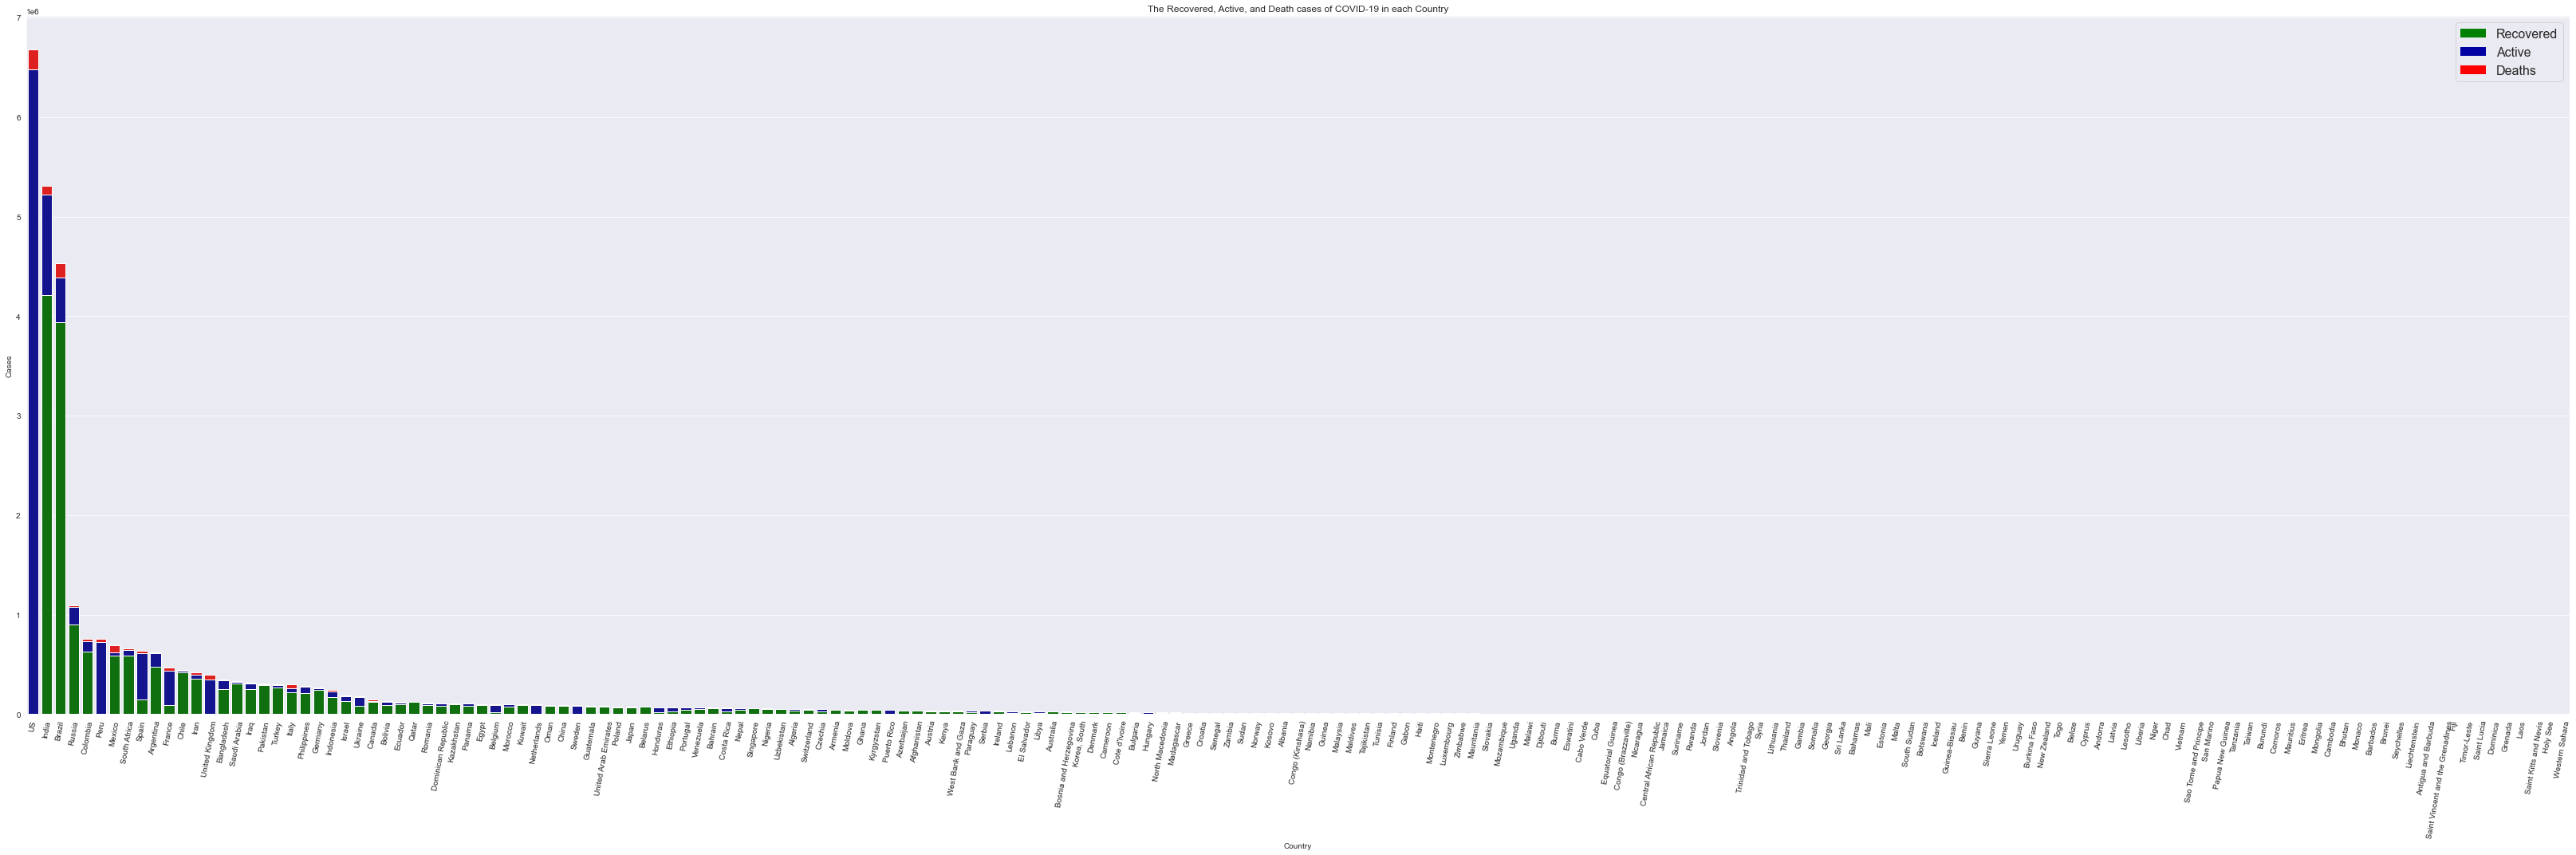

In [47]:
#Plot the graph

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (45, 15)})

deaths = sorted_df["confirmed_sum"]
actives = sorted_df["recovered_sum"] + sorted_df["active_sum"].dropna()

#Plot 1 - "top" series - "Deaths"
sns.barplot(x = sorted_df["Country_Region"], y = deaths, color = "red")

#Plot 2 - "middle" series - "Active"
middle_plot = sns.barplot(x = sorted_df["Country_Region"], y = actives, color = "#0000A3")

#Plot 3 - "bottom" series - "Recovered"
bottom_plot = sns.barplot(x = sorted_df["Country_Region"], y = sorted_df["recovered_sum"], color = "green")

# Legend
top = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
middle = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
bottom = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
l = plt.legend([bottom, middle, top], ['Recovered', 'Active', 'Deaths'], loc=1, ncol = 1, prop={'size':16})

# Labels
bottom_plot.set_ylabel("Cases")
bottom_plot.set_xlabel("Country")
bottom_plot.set_title("The Recovered, Active, and Death cases of COVID-19 in each Country")
plt.xticks(rotation=80)
plt.tight_layout()
#plt.savefig('../plots/location_country_stackedbar.png') # save output figure as an image


In [ ]:

# Plot the graph

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (45, 15)})

deaths = location["Confirmed"]
actives = location["Recovered"] + location["Active"].dropna()

#Plot 1 - "top" series - "Deaths"
sns.barplot(x = location["Country_Region"], y = deaths, color = "red")

#Plot 2 - "middle" series - "Active"
middle_plot = sns.barplot(x = location["Country_Region"], y = actives, color = "#0000A3")

#Plot 3 - "bottom" series - "Recovered"
bottom_plot = sns.barplot(x = location["Country_Region"], y = location["Recovered"], color = "green")

# Legend
top = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
middle = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
bottom = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
l = plt.legend([bottom, middle, top], ['Recovered', 'Active', 'Deaths'], loc=1, ncol = 1, prop={'size':16})

# Labels
bottom_plot.set_ylabel("Cases")
bottom_plot.set_xlabel("Country")
bottom_plot.set_title("The Recovered, Active, and Death cases of COVID-19 in each Country")
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('../plots/location_country_stackedbar.png') # save output figure as an image


***The Incidence Rate of Countries with COVID-19 cases***

In [ ]:
sns.set_style("white")
sns.set_context({"figure.figsize": (30, 15)})
sns.barplot(x = location["Country_Region"], y = location['Incidence_Rate'].dropna(), color = "#460a73")
plt.xlabel('Country')
plt.ylabel('Incidence Rate')
plt.title('The Incidence Rate of Countries with COVID-19 cases')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('../plots/location_incidence_rate.png') 

***The Case - Fatality Ratio of each Country in regards of COVID-19***

In [ ]:
sns.set_style("white")
sns.set_context({"figure.figsize": (30, 15)})
sns.barplot(x = location["Country_Region"], y = location['Case-Fatality_Ratio'].dropna(), color = "#700b3e")
plt.xlabel('Country')
plt.ylabel('Case-Fatality Ratio')
plt.title('The Case-Fatality Ratio of Countries with COVID-19 cases')
plt.xticks(rotation=80)
plt.tight_layout()
plt.savefig('../plots/location_case-fatality.png') 
